# Doublechanngel receiver example

In [11]:
! bladeRF-cli -p


  Description:    Nuand bladeRF 2.0
  Backend:        libusb
  Serial:         eb56038a9b0d4ccdace93a3476002277
  USB Bus:        2
  USB Address:    3



In [12]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (16, 8)

In [13]:
import numpy as np
from numpy.fft import fft, fftshift, fftfreq

In [14]:
import pyblade

In [15]:
rx_config = pyblade.RxConfig(
    samplerate='4M',
    frequency=433e6,
    bandwidth='2M',
    n_samples='1M',
    agc=None,  # disable AGC
    channels=(1, 2),  # read from channel 1 and 2
)

In [16]:
rx_config

RxConfig(samplerate='4M', frequency=433000000.0, bandwidth='2M', channels=(1, 2), n_samples='1M', agc=None)

In [30]:
iq = pyblade.run(
    rx_config=rx_config,
    scenario=('rx start',
              'rx',
              'rx wait')
)

In [31]:
iq.shape

(2, 524288)

In [32]:
x_t = iq[0, ]
y_t = iq[1, ]

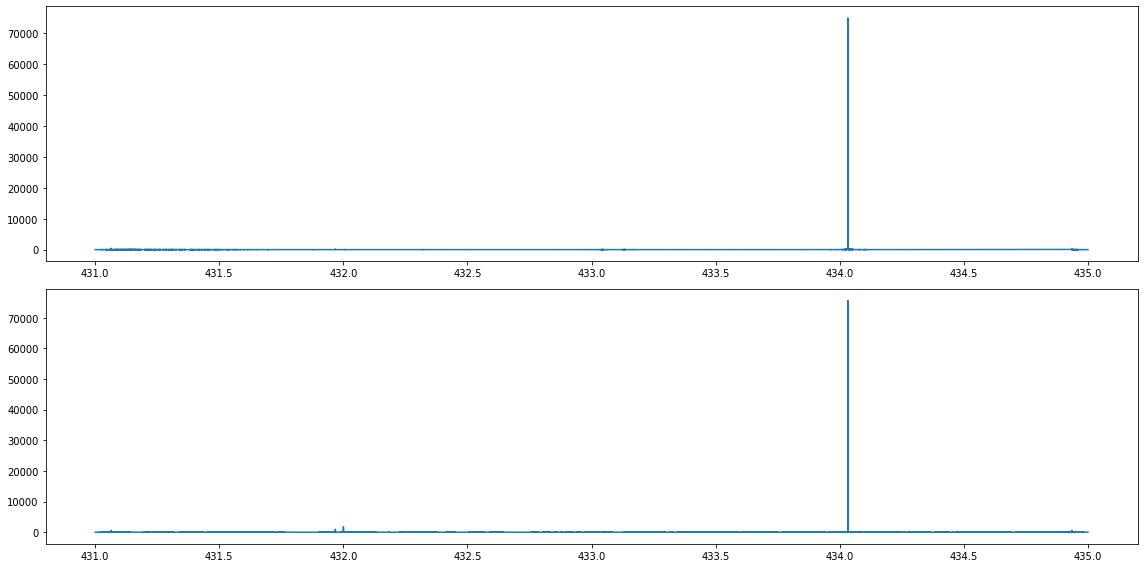

In [33]:
t_s = 1. / rx_config.samplerate_

f = (fftfreq(len(x_t), d=t_s) + rx_config.frequency_) * 1e-6
f = fftshift(f)

x_f = fftshift(fft(x_t))
y_f = fftshift(fft(y_t))

fig, (axis_x, axis_y) = plt.subplots(nrows=2)

axis_x.plot(f, np.abs(x_f))
axis_y.plot(f, np.abs(y_f))

fig.tight_layout()

In [37]:
f_x_max = f[np.abs(x_f).argmax()]
f_x_max

434.03248596191406

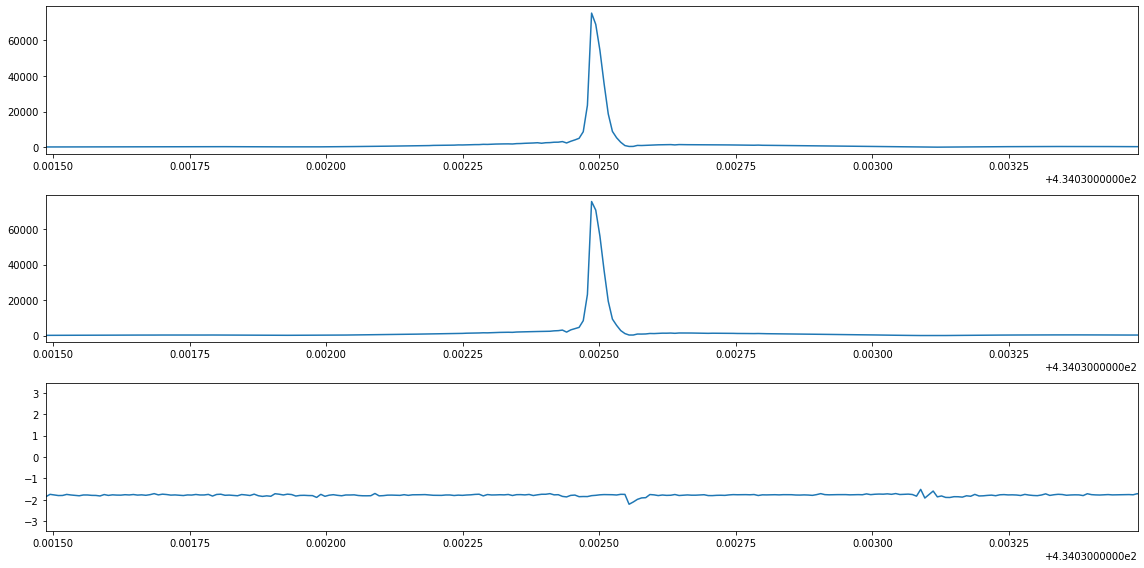

In [39]:
delta_f = .001

fig, (axis_x, axis_y, axis_phi) = plt.subplots(nrows=3)

axis_x.plot(f, np.abs(x_f))
axis_y.plot(f, np.abs(y_f))
axis_phi.plot(f, np.angle(x_f * y_f.conj()))

for axis in (axis_x, axis_y, axis_phi):
    axis.set_xlim(f_x_max - delta_f, f_x_max + delta_f)
    
fig.tight_layout()